# Лабораторная работа №1
## Фильтрация шумов на полутоновых изображениях

1. Считать цветное rgb изображение.
2. Преобразовать изображение в градации серого.
3. Зашумить изображение аддитивным шумом с вероятностью p (по вариантам).
  *   Вход: изображение из пункта 2
  *   Вывод: зашумленное изображение
4. Написать функцию реализации свертки (прохождение окном по изображению)
5. Написать функцию реализации свертки (с помощью преобразования фурье)
6. Написать функцию реализации кросс-кореляции (с помощью функции свертки через фурье преобразование).

> Функции вида fun(mat1, mat2)  
Где mat1  - первый сигнал, а mat2 - второй сигнал.

7. Вычислить отсчеты функции  взаимной корреляции между исходным изображением и зашумленным (B<sub>xy</sub>). Вывести получившуюся матрицу как изображение.
8. Вычислить отсчеты функции  автокорреляции зашумленного изображения (B<sub>y</sub>). Вывести получившуюся матрицу как изображение.
9. Составить матрицы отсчетов для решения системы уравнений Винера-Хопфа для заданной области D.
10. Решить полученную СЛАУ (numpy.linalg.solve). На основе вектора решений построить матрицу КИХ фильтра.
11. Отфильтровать изображение полученным КИХ фильтром. Подсчитать СКО (RMSE).
  *   Вход: изображение из пункта 3
  *   Вывод: Значения СКО (RMSE). Исходное (из пункта 2), зашумленное (из пункта 3) и отфильтрованное изображение.
  *   СКО (RMSE) считать между отфильтрованным изображением и исходным (не зашумленным) из пункта 2

  
    
    
*Для работы с изображением использовать OpenCV (открытие, сохранение и т.д.). Для визуализации можно использовать matplotlib. Все необходимые для задания функции реализовавать самим, а не использовать готовые в OpenCV, если не указано обратного.*
  
  
  

---



> По всем вопросам писать в ЛС в tg ***volfgunus***




Ссылки на полезные ресурсы:

1.   [Методичка по фильтрации изображений](http://repo.ssau.ru/bitstream/Metodicheskie-ukazaniya/Filtraciya-shumov-na-izobrazheniyah-Elektronnyi-resurs-elektron-metod-ukazaniya-k-lab-rabote-3-53762/1/%D0%A1%D0%B5%D1%80%D0%B3%D0%B5%D0%B5%D0%B2%20%D0%92.%D0%92.%20%D0%A4%D0%B8%D0%BB%D1%8C%D1%82%D1%80%D0%B0%D1%86%D0%B8%D1%8F%20%D1%88%D1%83%D0%BC%D0%BE%D0%B2.pdf)
2.    [Методичка по теории обработки сигналов( там свертка, КИХ фильтр и т.д. )](http://repo.ssau.ru/bitstream/Uchebnye-posobiya/Teoriya-cifrovoi-obrabotki-signalov-i-izobrazhenii-Elektronnyi-resurs-ucheb-po-specialnosti-Inform-bezopasnost-avtomatizir-sistem-54688/1/%d0%a1%d0%b5%d1%80%d0%b3%d0%b5%d0%b5%d0%b2%20%d0%92.%d0%92.%20%d0%a2%d0%b5%d0%be%d1%80%d0%b8%d1%8f%20%d1%86%d0%b8%d1%84%d1%80%d0%be%d0%b2%d0%be%d0%b9.pdf)
2.    [Документация OpenCV](https://docs.opencv.org/4.x/index.html)

# Варианты задания


№ варианта | Вероятность p | Область D
--- | :---: | :---:
1 | 0,1 | {(-1,-1), ... , (1,1)}
2 | 0,08 | {(0,0), ... , (2,2)}
3 | 0,11 | {(-2,-2), ... , (0,0)}
4 | 0,09 | {(-3,-3), ... , (-1,-1)}
5 | 0,13 | {(-1,-1), ... , (2,2)}
6 | 0,09 | {(-2,-2), ... , (1,1)}
7 | 0,12 | {(0,0), ... , (3,3)}
8 | 0,14 | {(1,1), ... , (3,3)}
9 | 0,17 | {(-3,-3), ... , (0,0)}
10 | 0,09 | {(0,0), ... , (2,2)}
11 | 0,08 | {(-1,-1), ... , (3,3)}


# Контрольные темы

1. Свёртка последовательностей.
2. Линейная фильтрация. Основные понятия.
3. КИХ фильтр.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

1. Считать цветное rgb-изображение

In [2]:
image_orig = cv2.resize(cv2.imread('img1.png',1).astype('uint8')[:,:,::-1], (256,256))

Функция нормализации значений изображения

In [3]:
def normalize(image):
    return (255 * ((image-image.min()) / (image.max()-image.min()))).astype(np.uint8)

Функция для вывода изображения

In [4]:
def show_image(image):
    image = normalize(image).astype('uint8')
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.show()

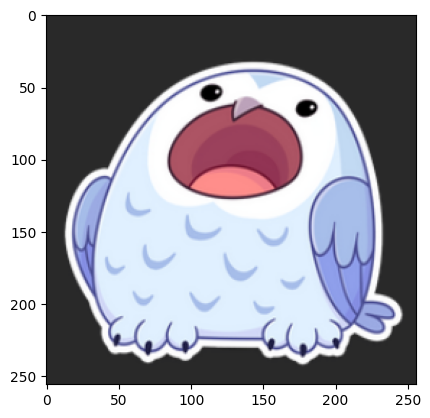

In [5]:
show_image(image_orig)

2. Преобразовать изображение в градации серого

In [6]:
def to_grayscale(image):
    image_gray = np.zeros([image.shape[0],image.shape[1]], dtype=np.uint8)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            image_gray[i][j] = np.sum(image[i][j])//3
    return image_gray

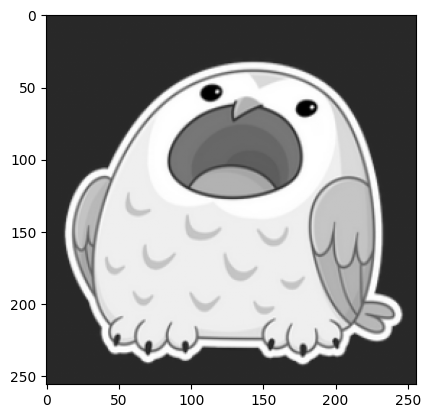

In [7]:
image_gray = to_grayscale(image_orig)
show_image(image_gray)

3. Зашумить изображение аддитивным шумом с вероятностью p (по вариантам)

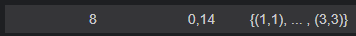

p=0.14;

Вход: изображенеи из пункта 2; выход: зашумленное изображение

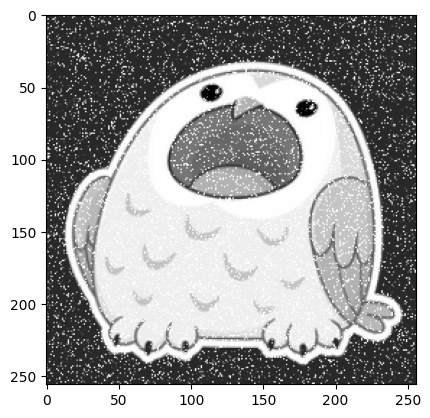

In [8]:
# Функция для удаления значений, выходящих за промежуток [0,255]
def remove_outliers(image):
    image = np.clip(image, 0, 255).astype(np.uint8)
    return image


# Функция добавления адитивного шума с вероятностью p=0.14
def additive_noise_func(image, interval):
    p = 0.14
    image_noise = np.zeros([image.shape[0], image.shape[1]], dtype=int)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if random.random() < p:
                noise = int(random.randint(interval[0], interval[1]))
                image_noise[i][j] = 255 if image[i,j].astype(int) + noise > 255 else image[i,j] + noise
            else:
                image_noise[i][j] = image[i,j]

    image_noise = remove_outliers(image_noise)
    return image_noise.astype('uint8')

image_with_noise = additive_noise_func(image_gray, [0,255])
show_image(image_with_noise)

4. Написать функцию реализации свертки (прохождение окном по изображению)

In [9]:
def convolution_by_map(image, kernel):
    matr_a = np.array(image, dtype=float)
    matr_b = np.array(kernel, dtype=float)
    image_conv = np.zeros([image.shape[0], image.shape[1]], dtype=int)

    for i in range(image_conv.shape[0]):
        for j in range(image_conv.shape[1]):
            s = 0
            for n in range(kernel.shape[0]):
                for m in range(kernel.shape[1]):
                    s += matr_a[i-n,j-m]*matr_b[n,m]
            image_conv[i][j] = s
    return image_conv

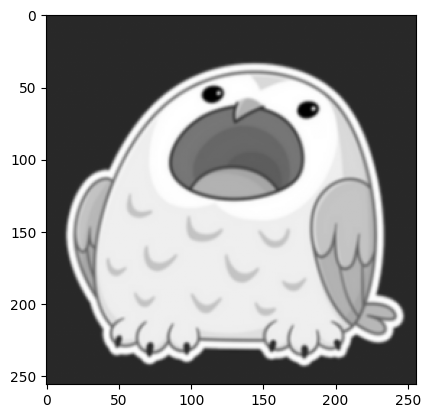

In [10]:
kernel = np.array([[1,2,1],[2,4,2],[1,2,1]],dtype=np.uint8)/16

image_conv = convolution_by_map(image_gray, kernel)
show_image(image_conv)

5. Написать функцию реализации свертки (с помощью преобразования фурье)

In [11]:
def convolution_fft1(image, kernel):
    image_fft =  image.copy().astype(complex)

    kernel_fft = np.zeros([image.shape[0], image.shape[1]], dtype=complex)
    for i in range(kernel.shape[0]):
        for j in range(kernel.shape[1]):
            kernel_fft[i,j] = kernel[i,j]


    image_fft = np.fft.fft2(image_fft)
    kernel_fft = np.fft.fft2(kernel_fft)

    res_fft = np.zeros([image.shape[0], image.shape[1]],dtype=complex)
    res_fft = image_fft * kernel_fft
    res_fft = np.fft.ifft2(res_fft).real
    return res_fft

In [12]:
def convolution_fft(image, kernel):
    image_fft = image.copy()

    kernel_fft = kernel.copy()

    image_h, image_w = image_fft.shape
    kernel_h, kernel_w = kernel_fft.shape
    height, width = image_h + kernel_h - 1, image_w + kernel_w - 1

    startHeight = ((kernel_h) // 2) - 1
    startWidth = ((kernel_w) // 2) - 1
    finishHeight = startHeight + image_h
    finishWidth = startWidth + image_w

    image_fft = np.fft.fft2(image_fft, (height, width))
    kernel_fft = np.fft.fft2(kernel_fft, (height, width))
    result_fft = np.fft.ifft2(image_fft * kernel_fft).real
    result_fft = result_fft[startHeight:finishHeight, startWidth:finishWidth]
    
    return result_fft

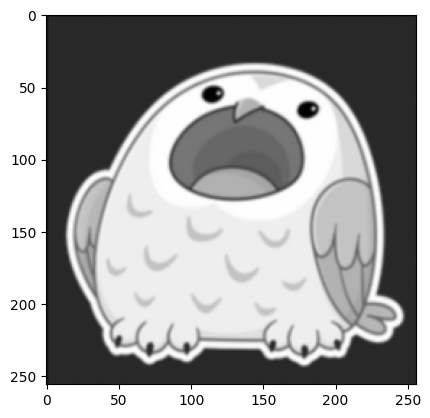

In [13]:
kernel2 = np.array([[1,2,1],[2,4,2],[1,2,1]],dtype=np.uint8)/16

image_conv = convolution_fft(image_gray, kernel2)
show_image(image_conv)

6. Написать функцию реализации кросс-кореляции (с помощью функции свертки через фурье преобразование).

Функции вида fun(mat1, mat2)  
Где mat1  - первый сигнал, а mat2 - второй сигнал.

In [14]:
def korr(sig1, sig2):
    return convolution_fft(sig1, np.flip(sig2))

7. Вычислить отсчеты функции  взаимной корреляции между исходным изображением и зашумленным (B<sub>xy</sub>). Вывести получившуюся матрицу как изображение.
8. Вычислить отсчеты функции  автокорреляции зашумленного изображения (B<sub>y</sub>). Вывести получившуюся матрицу как изображение.

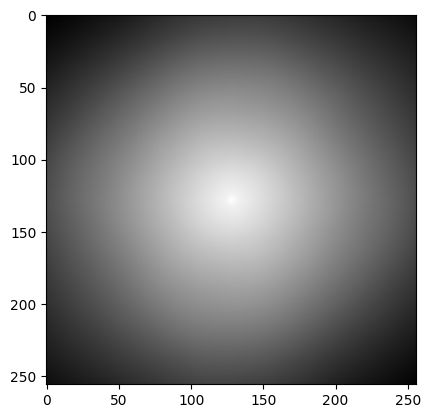

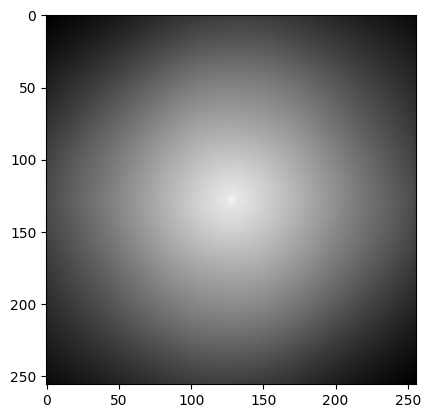

In [15]:
B_xy = korr(image_gray, image_with_noise)
B_y = korr(image_with_noise, image_with_noise)
show_image(B_xy)
show_image(B_y)

9. Составить матрицы отсчетов для решения системы уравнений Винера-Хопфа для заданной области D.

![изображение.png](attachment:2d43e6fd-4d86-4e06-9ca1-a51d15a11328.png)

D=[[1,1],..,[3,3]]

10. Решить полученную СЛАУ (numpy.linalg.solve). На основе вектора решений построить матрицу КИХ фильтра.

In [16]:
def find_g(B_xy, B_y):
    D = [[1,1],
         [3,3]]
    row_start, row_end = D[0][0], D[1][0]
    col_start, col_end = D[0][1], D[1][1]
    
    height = row_end - row_start + 1
    width = col_end - col_start + 1
    
    matr_A = np.empty([height*width, height*width])
    matr_B = np.empty([height * width,1])
    
    center_x, center_y = B_y.shape[0]//2, B_y.shape[1]//2
    
    # Действуя на области D:
    for row in range(row_start, row_end + 1):
        for col in range(col_start, col_end + 1):
            id_x = (row-row_start) * width + (col-col_start)
            matr_B[id_x] = B_xy[center_x - row, center_y - col]
            
            for i in range(row_start, row_end + 1):
                for j in range(col_start, col_end + 1):
                    id_y = (i-row_start) * width + (j-col_start)
                    matr_A[id_x,id_y] = B_y[row - i + center_x, col - j + center_y]
                    
    return np.linalg.solve(matr_A, matr_B).reshape(height, width)

In [17]:
g = find_g(B_xy, B_y)
print(g)

[[0.3475191  0.15571139 0.09662637]
 [0.16222501 0.03767046 0.01741868]
 [0.10022902 0.0204129  0.00569346]]


11. Отфильтровать изображение полученным КИХ фильтром. Подсчитать СКО (RMSE).
  *   Вход: изображение из пункта 3
  *   Вывод: Значения СКО (RMSE). Исходное (из пункта 2), зашумленное (из пункта 3) и отфильтрованное изображение.
  *   СКО (RMSE) считать между отфильтрованным изображением и исходным (не зашумленным) из пункта 2

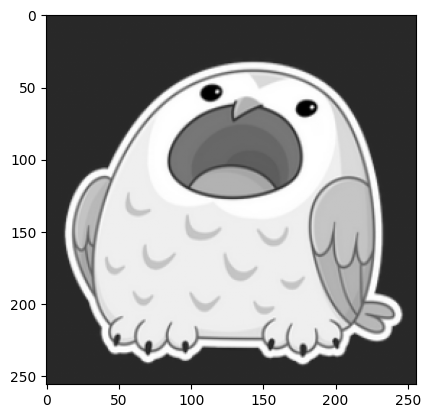

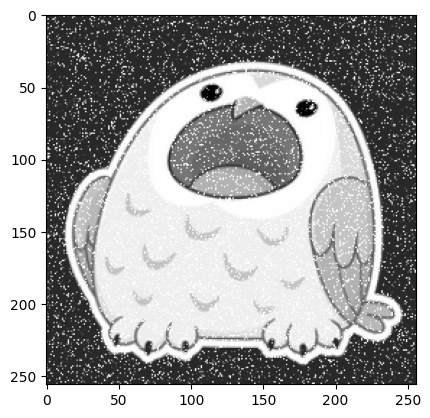

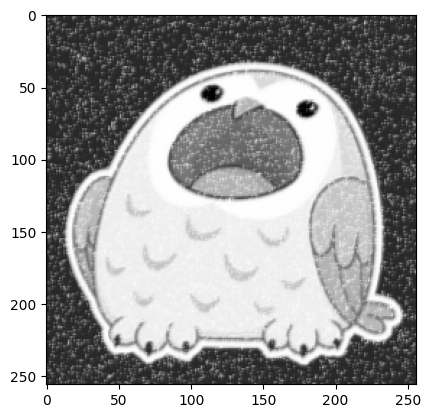

STD(gray/noised) 38.974064
STD(gray/restored) 23.765894


In [18]:
def restore(image,g):
    restored_image = convolution_fft(image, g)
    return restored_image

def count_std(img1,img2):
    return np.sqrt(np.mean((img1.astype(np.float32) - img2.astype(np.float32)) ** 2))
    
show_image(image_gray)
show_image(image_with_noise)
image_restored = restore(image_with_noise,g)
show_image(image_restored)

print("STD(gray/noised)", count_std(image_gray,image_with_noise))
print("STD(gray/restored)", count_std(image_gray,image_restored))